# Exploring the Julia Set in Julia

In [1]:
const maxiter = 100

function julia(z, c)
    for n = 1:maxiter
        abs2(z) > 4 && return n-1
        z = z^2 + c
    end
    return maxiter
end

julia (generic function with 1 method)

In [5]:
julia(-0.06 + .50im, -0.02 + .66im)

70

In [10]:
julia(2, 0.25)

1

In [11]:
julia("foo", "bar")

MethodError: MethodError: no method matching abs2(::String)
Closest candidates are:
  abs2(!Matched::Missing) at missing.jl:79
  abs2(!Matched::Bool) at bool.jl:92
  abs2(!Matched::Real) at number.jl:157
  ...

In [12]:
[julia(r + i*im, -0.06 + .665im) for r=-1:.002:1, i=-0.5:.002:0.5]

1001×501 Array{Int64,2}:
  2   2   2   2   2    2    2    2    2  …   71   37   35  35  34  33  33  33
  2   2   2   2   2    2    2    2    2     100   38   36  35  34  33  33  32
  2   2   2   2   2    2    2    2    2      76  100  100  36  33  33  32  32
  2   2   2   2   2    2    2    2    2      56  100   45  34  33  32  32  32
  2   2   2   2   2    2    2    2    2      61   67   36  34  32  32  32  31
  2   2   2   2   2    2    2    2    2  …   89  100   35  33  32  32  31  31
  2   2   2   2   2    2    2    2    2     100   44   73  34  32  31  31  31
  2   2   2   2   2    2    2    2    2      56   91   54  58  31  31  30  30
  2   2   2   2   2    2    2    2    2      61   42   35  31  30  30  30  30
  2   2   2   2   2    2    2    2    2      67   33   31  30  29  29  29  30
  2   2   2   2   2    2    2    2    2  …   66   35   30  29  29  29  29  29
  2   2   2   2   2    2    2    2    2      64   58   29  28  28  28  29  29
  2   2   2   2   2    2    2    2    2

In [13]:
@code_native julia(-0.02 + .7im, -0.06 + .665im)

	.section	__TEXT,__text,regular,pure_instructions
; Function julia {
; Location: In[1]:4
	vmovupd	(%rdi), %xmm1
; Location: In[1]:5
; Function abs2; {
; Location: complex.jl:261
; Function *; {
; Location: float.jl:399
	vmulpd	%xmm1, %xmm1, %xmm0
;}}
; Function abs2; {
; Location: float.jl:395
	vpermilpd	$1, %xmm0, %xmm2 ## xmm2 = xmm0[1,0]
	vaddsd	%xmm2, %xmm0, %xmm3
	movabsq	$4910611176, %rcx       ## imm = 0x124B1FAE8
;}
; Function >; {
; Location: operators.jl:286
; Function <; {
; Location: float.jl:488
; Function <; {
; Location: float.jl:452
	vucomisd	(%rcx), %xmm3
;}}}
	ja	L113
	vmovsd	(%rsi), %xmm3           ## xmm3 = mem[0],zero
	vmovsd	8(%rsi), %xmm4          ## xmm4 = mem[0],zero
; Location: In[1]:5
	vpermilpd	$1, %xmm1, %xmm5 ## xmm5 = xmm1[1,0]
	xorl	%eax, %eax
	vmovsd	(%rcx), %xmm6           ## xmm6 = mem[0],zero
	nopw	(%rax,%rax)
; Location: In[1]:6
; Function iterate; {
; Location: range.jl:591
; Function ==; {
; Location: promotion.jl:425
L64:
	cmpq	$99, %rax
;}}
	je	

In [14]:
@code_native julia(1, 2)

	.section	__TEXT,__text,regular,pure_instructions
; Function julia {
; Location: In[1]:5
; Function abs2; {
; Location: number.jl:157
; Function *; {
; Location: In[1]:4
	imulq	%rdi, %rdi
	xorl	%eax, %eax
;}}
; Function >; {
; Location: operators.jl:286
; Function <; {
; Location: int.jl:49
	cmpq	$4, %rdi
;}}
	jg	L39
	nopl	(%rax)
; Location: In[1]:6
; Function iterate; {
; Location: range.jl:591
; Function ==; {
; Location: promotion.jl:425
L16:
	cmpq	$99, %rax
;}}
	je	L40
; Function +; {
; Location: int.jl:53
	addq	%rsi, %rdi
;}
; Location: In[1]:5
; Function abs2; {
; Location: number.jl:157
; Function *; {
; Location: int.jl:54
	imulq	%rdi, %rdi
;}}
	addq	$1, %rax
; Function >; {
; Location: operators.jl:286
; Function <; {
; Location: int.jl:49
	cmpq	$5, %rdi
;}}
	jl	L16
L39:
	retq
L40:
	movl	$100, %eax
; Location: In[1]:5
	retq
	nop
;}


In [15]:
using Colors, Images

In [16]:
const cmap = convert(Vector{RGB{N0f8}}, colormap("RdBu", 100))

In [17]:
typeof(ans)

Array{RGB{Normed{UInt8,8}},1}

In [18]:
px = cmap[75]

In [19]:
dump(px)

RGB{Normed{UInt8,8}}
  r: Normed{UInt8,8}
    i: UInt8 0x76
  g: Normed{UInt8,8}
    i: UInt8 0xb4
  b: Normed{UInt8,8}
    i: UInt8 0xe8


In [20]:
px.r

0.463N0f8

In [21]:
px.r + px.b

0.369N0f8

In [22]:
@code_native px.r + px.b

	.section	__TEXT,__text,regular,pure_instructions
; Function + {
; Location: normed.jl:91
; Function +; {
; Location: normed.jl:91
	movb	(%rsi), %al
	addb	(%rdi), %al
;}
	retq
	nopw	%cs:(%rax,%rax)
;}


In [23]:
@which px.r + px.b

+(x::Normed{T,f}, y::Normed{T,f}) where {T, f} in FixedPointNumbers at /Users/stefan/.julia/packages/FixedPointNumbers/3QAEg/src/normed.jl:91

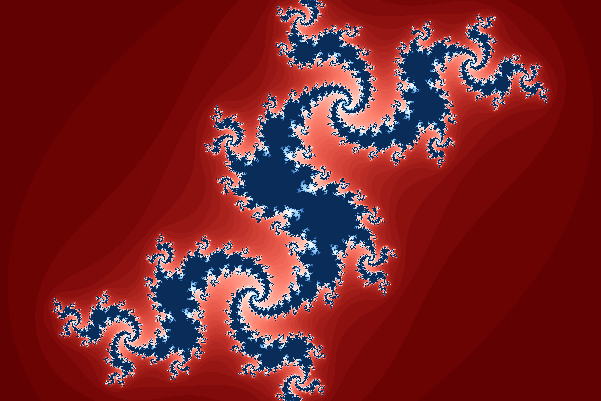

In [29]:
[cmap[julia(r + i*im, -0.04 + .7im)] for i=-1:.005:1, r=-1.5:.005:1.5]

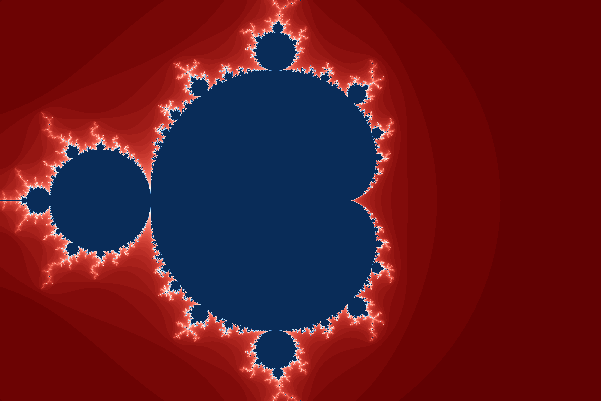

In [30]:
[cmap[julia(r + i*im, r + i*im)] for i=-1:.005:1, r=-1.5:.005:1.5]

In [31]:
using Interact

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/26d81b3f84be5e55115749ad4db58fe3ef166c26-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/26d81b3f84be5e55115749ad4db58fe3ef166c26-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

  0.011154 seconds (2 allocations: 706.141 KiB)


Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:r′=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64}("ob_57", 0, Any[SyncCallback(Scope("knockout-component-a3dd29d8-c2f8-4c97-9bb4-f21e3c58184c", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["r′"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>21,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any}("ob_55", ["-0.1", "-0.09", "-0.08", "-0.07", "-0.06", "-0.05", "-0.04", "-0.03", "-0.02", "-0.01"  …  "0.01", "0.02", "0.03", "0.04", "0.05", "0.06", "0.07", "0.08", "0.09", "0.1"], Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_vals")))]), nothing),"changes"=>(Observable{Int64}(#= circular reference @-6 =#), nothing),"formatted_value"=>(Observable{String}("ob_56", "0.0", Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_value")))]), nothing),"index"=>(Observable{Any}("ob_54", 11, Any[##25#28{##70#73,Observable{Float64},Array{Function,1}}(##70#73(Box(-0.1:0.01:0.1)), Observable{Float64}("ob_53", 0.0, Any[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(-0.1:0.01:0.1)), Observable{Any}(#= circular reference @-6 =#), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(#= circular reference @-2 =#), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-5 =#)]), #g#15{##16#17{##39#42,Observable{Any}},Tuple{Observable{Float64},Observable{Float64}}}(##16#17{##39#42,Observable{Any}}(##39#42(), Observable{Any}("ob_63", RGB{Normed{UInt8,8}}[RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008) … RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008); RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008) … RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008); … ; RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008) … RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008); RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008) … RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008)], Any[])), (Observable{Float64}(#= circular reference @-4 =#), Observable{Float64}("ob_58", 0.75, Any[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(0.65:0.01:0.85)), Observable{Any}("ob_59", 11, Any[##25#28{##70#73,Observable{Float64},Array{Function,1}}(##70#73(Box(0.65:0.01:0.85)), Observable{Float64}(#= circular reference @-6 =#), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(#= circular reference @-5 =#), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-2 =#)]), SyncCallback(Scope("knockout-component-7b2f9957-b6dc-490f-9def-3e31e0265de8", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["i′"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 
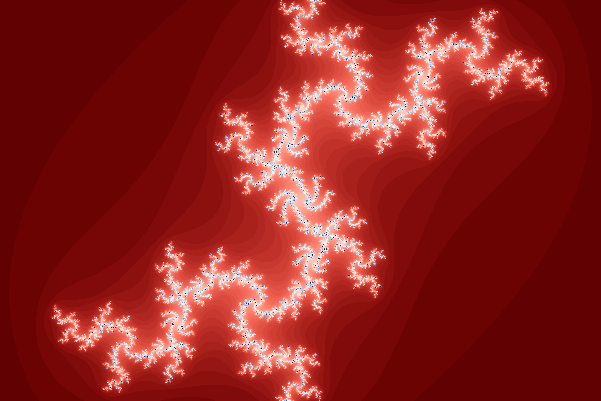
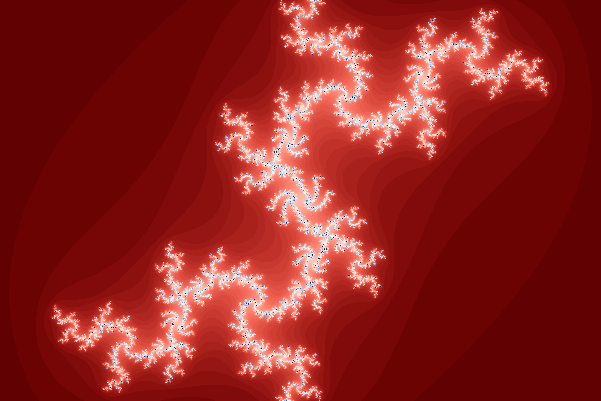

  0.014426 seconds (2 allocations: 706.141 KiB)
  0.014252 seconds (2 allocations: 706.141 KiB)
  0.018565 seconds (2 allocations: 706.141 KiB)
  0.025192 seconds (2 allocations: 706.141 KiB, 16.85% gc time)
  0.021158 seconds (2 allocations: 706.141 KiB)
  0.025694 seconds (2 allocations: 706.141 KiB)
  0.018865 seconds (2 allocations: 706.141 KiB)
  0.014553 seconds (2 allocations: 706.141 KiB)
  0.011481 seconds (2 allocations: 706.141 KiB)
  0.010300 seconds (2 allocations: 706.141 KiB)
  0.010321 seconds (2 allocations: 706.141 KiB)
  0.009119 seconds (2 allocations: 706.141 KiB)
  0.009450 seconds (2 allocations: 706.141 KiB)
  0.008755 seconds (2 allocations: 706.141 KiB)
  0.012363 seconds (2 allocations: 706.141 KiB)
  0.012725 seconds (2 allocations: 706.141 KiB, 25.22% gc time)
  0.009939 seconds (2 allocations: 706.141 KiB)
  0.009673 seconds (2 allocations: 706.141 KiB)
  0.010050 seconds (2 allocations: 706.141 KiB)
  0.014915 seconds (2 allocations: 706.141 KiB, 24.90% g

In [38]:
@manipulate for r′ = -0.1:0.01:0.1, i′ = 0.65:0.01:0.85
    [cmap[julia(r + i*im, r′ + i′*im)] for i=-1:.005:1, r=-1.5:.005:1.5]
end

In [41]:
using Pkg
Pkg.add("BenchmarkTools")
using BenchmarkTools

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `ssh://git@github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/training/ORNLTraining/Project.toml`
 [no changes]
  Updating `~/training/ORNLTraining/Manifest.toml`
 [no changes]


In [45]:
[cmap[julia(r + i*im, r′ + i′*im)] for i=-1:.005:1, r=-1.5:.005:1.5]

MethodError: MethodError: no method matching *(::Widget{:slider,Float64}, ::Complex{Bool})
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:502
  *(!Matched::Bool, ::Complex{Bool}) at complex.jl:281
  *(!Matched::Bool, ::Complex) at complex.jl:288
  ...

  0.008990 seconds


Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:i′=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64}("ob_70", 0, Any[SyncCallback(Scope("knockout-component-310e14fb-1db4-46ea-adac-75894d65ff17", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["i′"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>21,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any}("ob_68", ["0.65", "0.66", "0.67", "0.68", "0.69", "0.7", "0.71", "0.72", "0.73", "0.74"  …  "0.76", "0.77", "0.78", "0.79", "0.8", "0.81", "0.82", "0.83", "0.84", "0.85"], Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_vals")))]), nothing),"changes"=>(Observable{Int64}(#= circular reference @-6 =#), nothing),"formatted_value"=>(Observable{String}("ob_69", "0.75", Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_value")))]), nothing),"index"=>(Observable{Any}("ob_67", 11, Any[##25#28{##70#73,Observable{Float64},Array{Function,1}}(##70#73(Box(0.65:0.01:0.85)), Observable{Float64}("ob_66", 0.75, Any[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(0.65:0.01:0.85)), Observable{Any}(#= circular reference @-6 =#), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(#= circular reference @-2 =#), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-5 =#)]), #g#15{##16#17{##45#47{StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}},Array{RGB{Normed{UInt8,8}},2},StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}}},Observable{Any}},Tuple{Observable{Float64},Observable{Float64}}}(##16#17{##45#47{StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}},Array{RGB{Normed{UInt8,8}},2},StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}}},Observable{Any}}(##45#47{StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}},Array{RGB{Normed{UInt8,8}},2},StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}}}(-1.0:0.005:1.0, RGB{Normed{UInt8,8}}[RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008) … RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008); RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008) … RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008); … ; RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008) … RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008); RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008) … RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008)], -1.5:0.005:1.5), Observable{Any}("ob_76", RGB{Normed{UInt8,8}}[RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008) … RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008); RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008) … RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008); … ; RGB
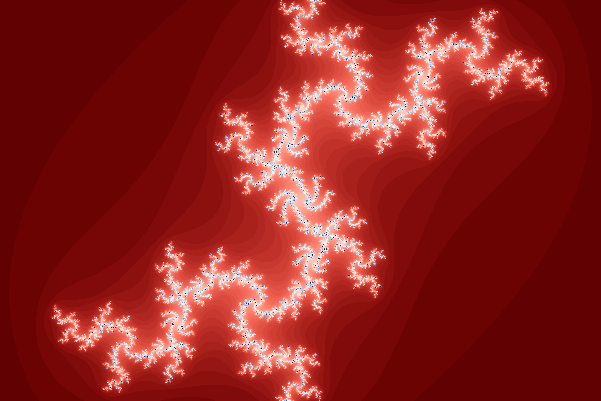
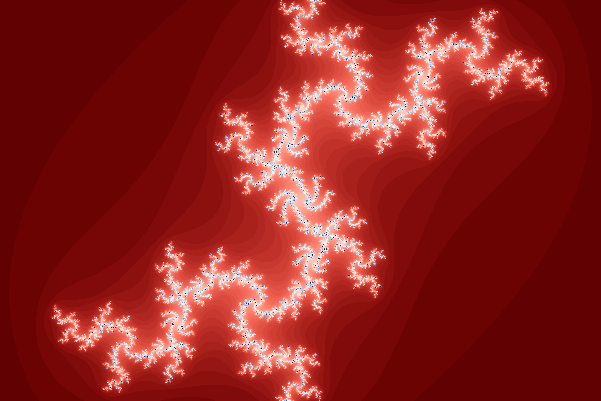

  0.010284 seconds
  0.012267 seconds
  0.008492 seconds
  0.008268 seconds
  0.008586 seconds
  0.012715 seconds
  0.008552 seconds
  0.008361 seconds
  0.008837 seconds
  0.008340 seconds
  0.007584 seconds
  0.007018 seconds
  0.007611 seconds
  0.007224 seconds
  0.010872 seconds
  0.007259 seconds
  0.007629 seconds
  0.008144 seconds
  0.009079 seconds
  0.008362 seconds
  0.008648 seconds
  0.008271 seconds
  0.008378 seconds
  0.008692 seconds
  0.008277 seconds
  0.008980 seconds
  0.008513 seconds
  0.008135 seconds
  0.006996 seconds
  0.007471 seconds
  0.011633 seconds
  0.009975 seconds
  0.012190 seconds
  0.013799 seconds
  0.015345 seconds
  0.016088 seconds
  0.016560 seconds
  0.016546 seconds
  0.015364 seconds
  0.014234 seconds
  0.012135 seconds
  0.007951 seconds
  0.007264 seconds
  0.006755 seconds
  0.005423 seconds
  0.005415 seconds
  0.005397 seconds
  0.005009 seconds
  0.004599 seconds
  0.006918 seconds
  0.005204 seconds
  0.005641 seconds
  0.005595 s

In [39]:
let I = -1:.005:1, R = -1.5:.005:1.5
    img = Array{RGB{N0f8}}(undef, length(I), length(R))
    @manipulate for i′ = 0.65:0.01:0.85, r′ = -0.1:0.01:0.1
        @time for (j, i) in enumerate(I),
            (k, r) in enumerate(R)
            img[j,k] = cmap[julia(r + i*im, r′ + i′*im)]
        end
        img
    end
end

  0.005091 seconds (546 allocations: 36.800 KiB)


Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:i′=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64}("ob_44", 0, Any[SyncCallback(Scope("knockout-component-7242621b-7616-45e6-ae95-50b98d3a7b49", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["i′"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>21,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any}("ob_42", ["0.65", "0.66", "0.67", "0.68", "0.69", "0.7", "0.71", "0.72", "0.73", "0.74"  …  "0.76", "0.77", "0.78", "0.79", "0.8", "0.81", "0.82", "0.83", "0.84", "0.85"], Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_vals")))]), nothing),"changes"=>(Observable{Int64}(#= circular reference @-6 =#), nothing),"formatted_value"=>(Observable{String}("ob_43", "0.75", Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_value")))]), nothing),"index"=>(Observable{Any}("ob_41", 11, Any[##25#28{##70#73,Observable{Float64},Array{Function,1}}(##70#73(Box(0.65:0.01:0.85)), Observable{Float64}("ob_40", 0.75, Any[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(0.65:0.01:0.85)), Observable{Any}(#= circular reference @-6 =#), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(#= circular reference @-2 =#), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-5 =#)]), #g#15{##16#17{##34#36{StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}},Array{RGB{Normed{UInt8,8}},2},StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}}},Observable{Any}},Tuple{Observable{Float64},Observable{Float64}}}(##16#17{##34#36{StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}},Array{RGB{Normed{UInt8,8}},2},StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}}},Observable{Any}}(##34#36{StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}},Array{RGB{Normed{UInt8,8}},2},StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}}}(-1.0:0.005:1.0, RGB{Normed{UInt8,8}}[RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008) … RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008); RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008) … RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008); … ; RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008) … RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008); RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008) … RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008)], -1.5:0.005:1.5), Observable{Any}("ob_50", RGB{Normed{UInt8,8}}[RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008) … RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008); RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008) … RGB{N0f8}(0.38,0.004,0.008) RGB{N0f8}(0.38,0.004,0.008); … ; RGB
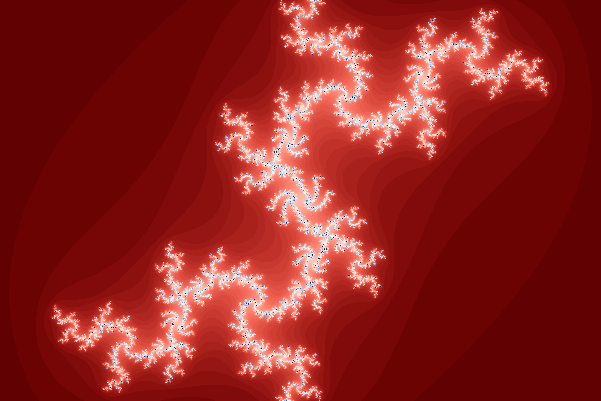
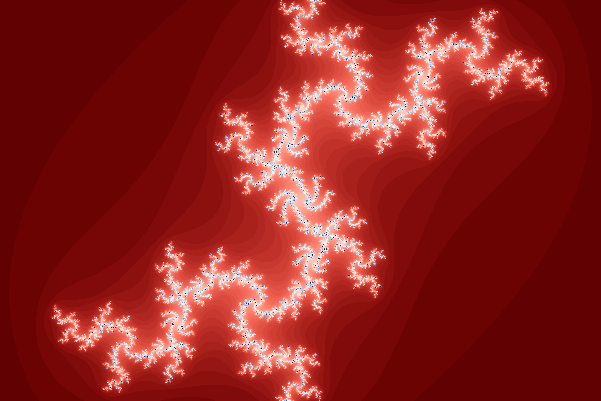

  0.005229 seconds (1 allocation: 144 bytes)
  0.001713 seconds (1 allocation: 144 bytes)
  0.004779 seconds (1 allocation: 144 bytes)
  0.004525 seconds (1 allocation: 144 bytes)
  0.010601 seconds (1 allocation: 144 bytes)
  0.005226 seconds (1 allocation: 144 bytes)
  0.008604 seconds (1 allocation: 144 bytes)
  0.005672 seconds (1 allocation: 144 bytes)
  0.006119 seconds (1 allocation: 144 bytes)
  0.007129 seconds (1 allocation: 144 bytes)
  0.006215 seconds (1 allocation: 144 bytes)
  0.002472 seconds (1 allocation: 144 bytes)
  0.015026 seconds (1 allocation: 144 bytes)
  0.008789 seconds (1 allocation: 144 bytes)
  0.005145 seconds (1 allocation: 144 bytes)
  0.003488 seconds (1 allocation: 144 bytes)
  0.004252 seconds (1 allocation: 144 bytes)
  0.007919 seconds (1 allocation: 144 bytes)
  0.007674 seconds (1 allocation: 144 bytes)
  0.007562 seconds (1 allocation: 144 bytes)
  0.009663 seconds (1 allocation: 144 bytes)
  0.007301 seconds (1 allocation: 144 bytes)
  0.004242

In [37]:
using Base.Threads

let I = -1:.005:1, R = -1.5:.005:1.5
    img = Array{RGB{N0f8}}(undef, length(I), length(R))
    @manipulate for i′ = 0.65:0.01:0.85, r′ = -0.1:0.01:0.1
        @threads for j = 1:length(I)
            i = I[j]
            for k = 1:length(R)
                r = R[k]
                img[j,k] = cmap[julia(r + i*im, r′ + i′*im)]
            end
        end
        img
    end
end

In [36]:
nthreads()

8

In [46]:
@benchmark julia(0.5 + 0.5im, 0.5 + 0.5im)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     5.869 ns (0.00% GC)
  median time:      6.464 ns (0.00% GC)
  mean time:        7.019 ns (0.00% GC)
  maximum time:     78.152 ns (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     999